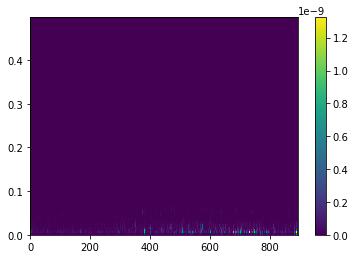

In [9]:
import scipy.io as sio
import scipy.signal as sig
import pandas as pd
import matplotlib.pyplot as plt


pacientes = ["P" + str(i).zfill(2) + ".mat" for i in range(1,10)]
electrodes = [8, 44, 80, 131, 185]
dtfspatient = None
dtfs = []

for paciente in pacientes:
    test = sio.loadmat(paciente)["data"]
    for electrode in electrodes:
        if (dtfspatient is None):
            dtfspatient = pd.DataFrame(test[:,electrode,:])
        else:
            dtfspatient.add(pd.DataFrame(test[:,electrode,:]))
            
    dtfs.append(dtfspatient / len(electrodes))
             
means = (sum(dtfs)/len(pacientes))
transforms = []
X = []
Y = []
Z = []

i = 0
mx = 0
for epoch in means.iterrows():
    y, z = sig.welch(epoch[1].as_matrix())
    X.append([i]*len(y))
    Y.append(y)
    Z.append(z)
    mx = max(mx,max(z))
    i += 1
    

plt.pcolor(X, Y, Z)
plt.colorbar()
plt.show()

# 